In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.style.use('ggplot')

In [3]:
df = pd.read_csv("beer_reviews.csv")
df.head(10)

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883
5,1075,Caldera Brewing Company,1325524659,3.0,3.5,3.5,oline73,Herbed / Spiced Beer,3.0,3.5,Caldera Ginger Beer,4.7,52159
6,1075,Caldera Brewing Company,1318991115,3.5,3.5,3.5,Reidrover,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159
7,1075,Caldera Brewing Company,1306276018,3.0,2.5,3.5,alpinebryant,Herbed / Spiced Beer,2.0,3.5,Caldera Ginger Beer,4.7,52159
8,1075,Caldera Brewing Company,1290454503,4.0,3.0,3.5,LordAdmNelson,Herbed / Spiced Beer,3.5,4.0,Caldera Ginger Beer,4.7,52159
9,1075,Caldera Brewing Company,1285632924,4.5,3.5,5.0,augustgarage,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159


In [4]:
df.shape

(1586614, 13)

### Basic Overview

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int64  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int64  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float64
 9   review_taste        1586614 non-null  float64
 10  beer_name           1586614 non-null  object 
 11  beer_abv            1518829 non-null  float64
 12  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


In [6]:
df.columns

Index(['brewery_id', 'brewery_name', 'review_time', 'review_overall',
       'review_aroma', 'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv',
       'beer_beerid'],
      dtype='object')

In [7]:
df.describe()

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.518829e+06,1.586614e+06
mean,3.130099e+03,1.224089e+09,3.815581e+00,3.735636e+00,3.841642e+00,3.743701e+00,3.792860e+00,7.042387e+00,2.171279e+04
std,5.578104e+03,7.654427e+07,7.206219e-01,6.976167e-01,6.160928e-01,6.822184e-01,7.319696e-01,2.322526e+00,2.181834e+04
min,1.000000e+00,8.406720e+08,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,3.000000e+00
25%,1.430000e+02,1.173224e+09,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,5.200000e+00,1.717000e+03
50%,4.290000e+02,1.239203e+09,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.500000e+00,1.390600e+04
75%,2.372000e+03,1.288568e+09,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,8.500000e+00,3.944100e+04
max,2.800300e+04,1.326285e+09,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.770000e+01,7.731700e+04


In [8]:
df.describe(include=['object'])

,brewery_name,review_profilename,beer_style,beer_name
count,1586599,1586266,1586614,1586614
unique,5742,33387,104,56857
top,Boston Beer Company (Samuel Adams),northyorksammy,American IPA,90 Minute IPA
freq,39444,5817,117586,3290


### Missing Values

In [9]:
df.isnull()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586609,False,False,False,False,False,False,False,False,False,False,False,False,False
1586610,False,False,False,False,False,False,False,False,False,False,False,False,False
1586611,False,False,False,False,False,False,False,False,False,False,False,False,False
1586612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64

In [11]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1518478 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1518478 non-null  int64  
 1   brewery_name        1518478 non-null  object 
 2   review_time         1518478 non-null  int64  
 3   review_overall      1518478 non-null  float64
 4   review_aroma        1518478 non-null  float64
 5   review_appearance   1518478 non-null  float64
 6   review_profilename  1518478 non-null  object 
 7   beer_style          1518478 non-null  object 
 8   review_palate       1518478 non-null  float64
 9   review_taste        1518478 non-null  float64
 10  beer_name           1518478 non-null  object 
 11  beer_abv            1518478 non-null  float64
 12  beer_beerid         1518478 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 162.2+ MB


In [12]:
df.isnull().sum()

brewery_id            0
brewery_name          0
review_time           0
review_overall        0
review_aroma          0
review_appearance     0
review_profilename    0
beer_style            0
review_palate         0
review_taste          0
beer_name             0
beer_abv              0
beer_beerid           0
dtype: int64

### Duplication

In [13]:
df.sort_values('review_overall', ascending=False)

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
1586613,14359,The Defiant Brewing Company,1160005319,5.0,4.5,4.5,cbl2,Pumpkin Ale,4.5,4.5,The Horseman's Ale,5.20,33061
1054114,718,Brouwerij Bavik,1154605683,5.0,4.0,4.5,BEERchitect,Witbier,4.5,4.0,Wittekerke,5.00,2477
783659,13014,Surly Brewing Company,1307970036,5.0,5.0,5.0,deadbody,American Brown Ale,5.0,5.0,Moe's Bender,5.52,58120
783658,13014,Surly Brewing Company,1309188322,5.0,5.0,4.0,pdeme,American Brown Ale,4.5,5.0,Moe's Bender,5.52,58120
1182432,10099,Dogfish Head Brewery,1133410163,5.0,4.5,4.0,Sayson,American Double / Imperial Stout,4.5,4.0,World Wide Stout,18.00,2392
...,...,...,...,...,...,...,...,...,...,...,...,...,...
653740,1412,Red Rock Brewing Company,1030008039,0.0,2.0,0.0,beernut7,Dunkelweizen,2.5,2.0,Red Rock Dunkel Weizen,4.00,3786
37234,1413,Desert Edge Brewery,1030197670,0.0,2.0,0.0,beernut7,Czech Pilsener,3.0,2.0,Pub Pils,4.00,3806
653706,1412,Red Rock Brewing Company,1030008142,0.0,3.0,0.0,beernut7,American Amber / Red Ale,2.5,3.5,Red Rock Amber Ale,4.00,3787
653695,1412,Red Rock Brewing Company,1030007859,0.0,2.0,0.0,beernut7,Hefeweizen,2.5,2.0,Red Rock Bavarian Weiss,4.00,3788


In [14]:
subset = ['review_profilename', 'beer_name']
df.drop_duplicates(subset=subset, keep='first')

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586609,14359,The Defiant Brewing Company,1162684892,5.0,4.0,3.5,maddogruss,Pumpkin Ale,4.0,4.0,The Horseman's Ale,5.2,33061
1586610,14359,The Defiant Brewing Company,1161048566,4.0,5.0,2.5,yelterdow,Pumpkin Ale,2.0,4.0,The Horseman's Ale,5.2,33061
1586611,14359,The Defiant Brewing Company,1160702513,4.5,3.5,3.0,TongoRad,Pumpkin Ale,3.5,4.0,The Horseman's Ale,5.2,33061
1586612,14359,The Defiant Brewing Company,1160023044,4.0,4.5,4.5,dherling,Pumpkin Ale,4.5,4.5,The Horseman's Ale,5.2,33061


In [15]:
df_no_dup = len(df.drop_duplicates(subset=subset, keep='first').index)
df_with_dup = len(df.index)

In [16]:
print("Percent of Duplicate Values:", round((df_with_dup - df_no_dup) / df_with_dup  * 100, 2),"%")

Percent of Duplicate Values: 1.46 %


### Some Basic Numbers

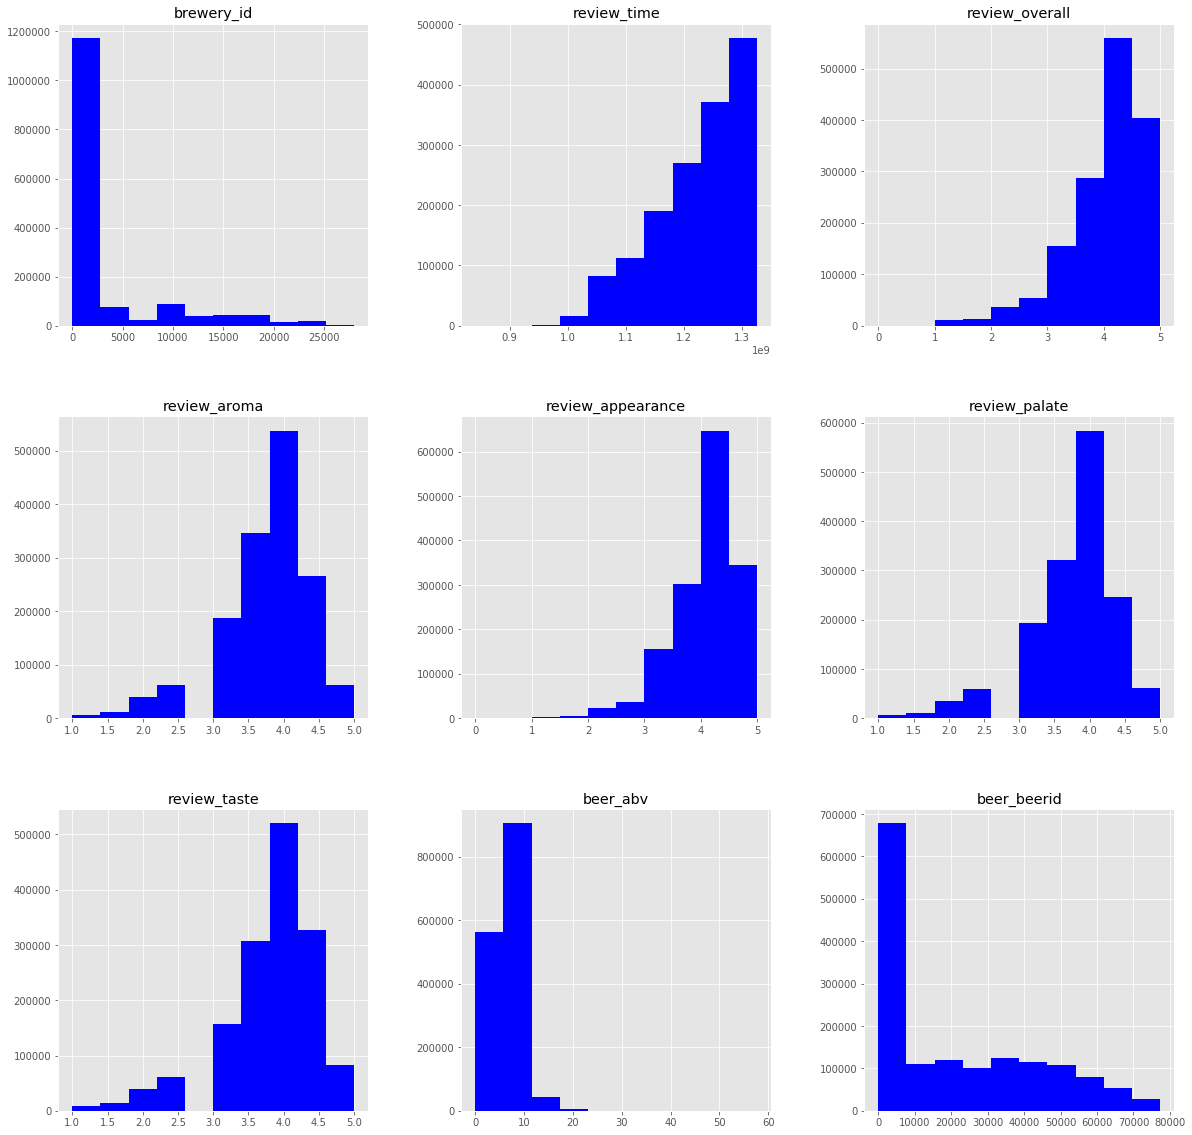

In [17]:
df.hist(figsize=(20,20), bins=10, color="blue")
plt.show()

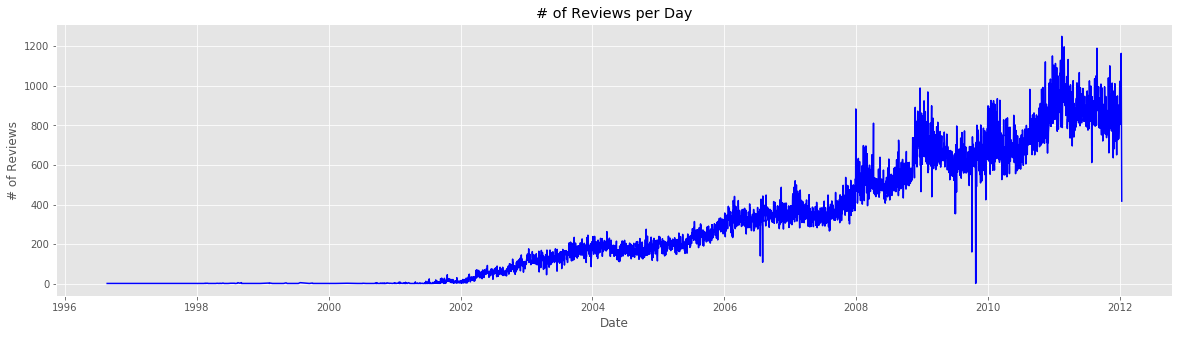

In [18]:
# df_copy = df.copy()
# df_copy['review_time'] = pd.to_datetime(df_copy['review_time'], unit='s')
# df_copy_by_date = df_copy[['review_time']].groupby(df_copy['review_time'].dt.date).agg(['count'])

df['review_time'] = pd.to_datetime(df['review_time'], unit='s')
df_by_date = df[['review_time']].groupby(df['review_time'].dt.date).agg(['count'])

plt.figure(figsize=(20,5))
# plt.plot(df_copy_by_date, color="blue")
plt.plot(df_by_date, color="blue")
plt.xlabel("Date")
plt.ylabel("# of Reviews")
plt.title("# of Reviews per Day")
plt.show()

Ratings of $0$:

In [19]:
df = df[(df['review_overall'] >= 1) | (df['review_appearance'] >= 1)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1518471 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   brewery_id          1518471 non-null  int64         
 1   brewery_name        1518471 non-null  object        
 2   review_time         1518471 non-null  datetime64[ns]
 3   review_overall      1518471 non-null  float64       
 4   review_aroma        1518471 non-null  float64       
 5   review_appearance   1518471 non-null  float64       
 6   review_profilename  1518471 non-null  object        
 7   beer_style          1518471 non-null  object        
 8   review_palate       1518471 non-null  float64       
 9   review_taste        1518471 non-null  float64       
 10  beer_name           1518471 non-null  object        
 11  beer_abv            1518471 non-null  float64       
 12  beer_beerid         1518471 non-null  int64         
dtypes: datetime6

### Top 10 Lists

In [21]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

In [25]:
top_10 = df[['beer_name', 
             'brewery_name', 
             'review_overall']].sort_values('review_overall', ascending=False).drop_duplicates('beer_name').head(10).sort_values('review_overall', ascending=True)

top_10['combined_name'] = top_10['brewery_name'].str.cat(top_10['beer_name'], sep=' : ')

p = [go.Bar(x = top_10['review_overall'],
            y = top_10['beer_name'],
            hoverinfo = 'x',
            text=top_10['brewery_name'],
            textposition = 'inside',
            orientation = 'h',
            opacity=0.7, 
            marker=dict(
                color='rgb(1, 87, 155)'))]

layout = go.Layout(title='Top 10 Beers (Overall Rating)',
                   xaxis=dict(title="Overall Rating",
                              tickformat = "%",
                              hoverformat = '.2%'),
                   margin = dict(l = 220),
                   font=dict(family='Courier New, monospace',
                            color='dark gray'))

fig = go.Figure(data=p, layout=layout)

py.offline.iplot(fig)

In [27]:
top_10_abv = df[['beer_name','brewery_name','beer_abv']].\
    sort_values('beer_abv', ascending=False). \
    drop_duplicates('beer_name').\
    head(10).\
    sort_values('beer_abv', ascending=True)

top_10_abv['combined_name'] = top_10_abv['brewery_name'].str.\
  cat(top_10_abv['beer_name'], sep=' : ')

p = [go.Bar(x = top_10_abv['beer_abv'],
            y = top_10_abv['beer_name'],
            hoverinfo = 'x',
            text=top_10_abv['brewery_name'],
            textposition = 'inside',
            orientation = 'h',
            opacity=0.7, 
            marker=dict(color='rgb(1, 87, 155)'))]

layout = go.Layout(title='Top 10 Strongest Beers by ABV',
                   xaxis=dict(title="ABV",
                              tickformat = "%",
                              hoverformat = '.2%'),
                   margin = dict(l = 220),
                   font=dict(family='Courier New, monospace',
                            color='dark gray'))

fig = go.Figure(data=p, layout=layout)

py.offline.iplot(fig)